# pymysql的使用

In [148]:
import pymysql
# help(pymysql)

# 链接数据库到db中
db=pymysql.Connect(host='127.0.0.1',  user='root',passwd="jazzsolo")#,  db='mysql')

# 游标-数据库重要概念，通过游标操作并存结果
cs = db.cursor()

# 查询数据库语言
sql = 'show databases'

# 查看有多少个记录
print(cs.execute(sql))
# 查看全部记录fetchall
cs.fetchall()

6


(('data_learn',),
 ('information_schema',),
 ('kaikeba',),
 ('mysql',),
 ('performance_schema',),
 ('sys',))

## 使用某个数据库

In [149]:


db.select_db('kaikeba')
sql='show tables'  # 查看有几个表
cs.execute(sql)    # 显示

3

In [128]:
cs.fetchone()

('score',)

In [129]:
cs.fetchone()

('student',)

In [130]:
cs.fetchone()

('students',)

In [131]:
cs.fetchone()  #一共三个，所以最后的是空的

## 另一种方法-fetchall

In [150]:
# 使用某个数据库
db.select_db('kaikeba')
sql='show tables'  # 查看有几个表
cs.execute(sql)    # 显示


3

In [151]:
cs.fetchall()   #查询所有

(('score',), ('student',), ('students',))

## 换个sql语句试试


In [153]:
sql='select * from student limit 10'
cs.execute(sql)
cs.fetchall()

(('108', '曾华', '男', datetime.datetime(1977, 9, 1, 0, 0), '95033'),
 ('105', '匡明', '男', datetime.datetime(1975, 10, 2, 0, 0), '95031'),
 ('107', '王丽', '女', datetime.datetime(1976, 1, 23, 0, 0), '95033'),
 ('101', '李军', '男', datetime.datetime(1976, 2, 20, 0, 0), '95033'),
 ('109', '王芳', '女', datetime.datetime(1975, 2, 10, 0, 0), '95031'),
 ('103', '陆君', '男', datetime.datetime(1974, 6, 3, 0, 0), '95031'))

## 关闭

In [146]:
# 关闭
db.close()

# 索引
- 对表中一列、多列排序 
- 定义一种储存结构 
- 快速检索到数据 
- 储存引擎级实现 

### 索引类型
- 普通索引： MySQL中基本索引类型，没有什么限制，允许在定义索引的列中插入重复值和空值，纯粹为了查询数据更快一些
- 唯一索引： 索引中列的值必须唯一，允许有null值
- 主键索引： 唯一索引，不允许有null值
- 组合索引： 在表的多个字段上建立索引
- 全文索引： 通过大文本中的关键字 
- 空间索引： mysql中有geometry、point、linstring、polygon几种

其他的
- 非聚簇索引：
- 聚簇索引：
- 覆盖索引：

注意：
- Mysql在查询时只能使用一个索引
- 提高了查询速度，降低了更新速度
- 不要使用like “%aaa%”操作
- 越小的数据类型通常更好 int 好于 text blok
- 尽量避免NULL值
- 最左前缀：组合索引中的左边列

# InnoDB及MyISAM索引结构

[一个介绍网页](https://www.jianshu.com/p/c3fb0b01c44d)
- MyISAM引擎：使用[B+Tree](https://baike.baidu.com/item/B-tree)作为索引结构，叶节点的data域存放的是数据记录的地址。MyISAM中主索引与辅助索引形式是一样的，主索引要求Key不能重复，副主索引Key可以重复。

- InnoDB引擎：与MyISAM索引与数据分开存放不同的是，InnoDB引擎数据文件本身就是一个索引，InnoDB引擎辅助索引叶子节点存放的是主键。

所以InnoDB的普通索引，实际上会扫描两遍：

- 第一遍：有普通索引找到PK；
- 第二遍：由PK找到记录行


# 事务
- 1. 原子性(Atomicity)：事务中的全部操作在数据库中是不可分割的，要么全部完成，要么全部不执行。
- 2. 一致性(Consistency)：几个并行执行的事务，其执行结果必须与按某一顺序 串行执行的结果相一致。
- 3. 夺隔离性(Isolation)：事务的执行不受其他事务的干扰，事务执行的中间结果对其他事务必须是透明的。
- 4. 夺持久性(Durability):对于任意已提交事务，系统必须保证该事务对数据库的改变不被丢失，即使数据库出现故障。

# 设计一个应用商店数据库

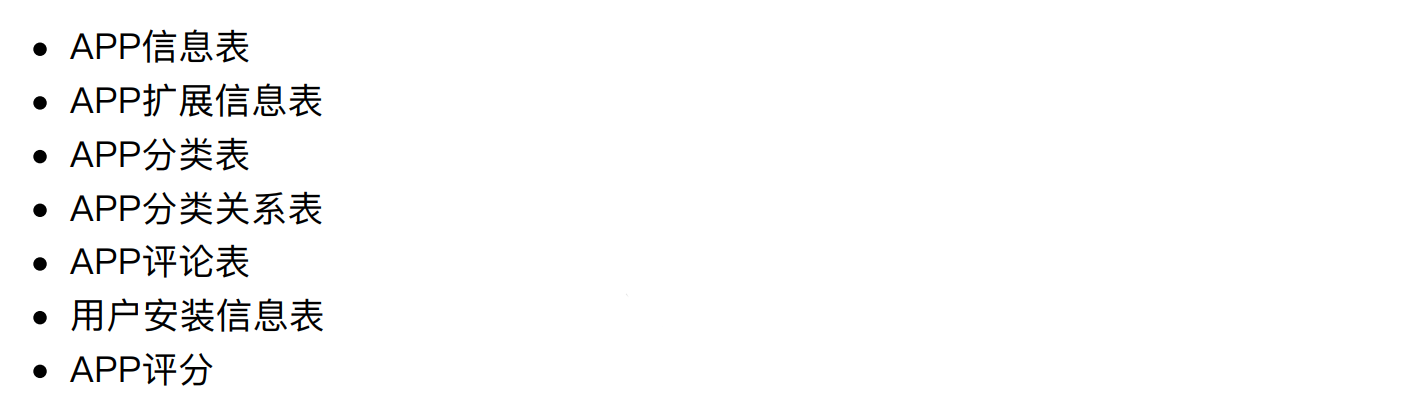

```SQL
具体有哪些表，要看业务场景及需求

-- app store数据库:
CREATE TABLE `table`(
    
)

-- app 信息表
-- app 扩展信息表
-- app 分类表
-- app 评分表 
-- app 评论表
-- app 安装信息表

mysql中 -- 作为注释


# 优化
## 一般的优化原则
- 是否请求了不需要的数据
- 不需要的列、行 都不去
- 对索引查找使用where子句消除不匹配的行
- 使用覆盖索引（Extra 列是 Using Index)避免访问的行
- 从表中检索出数据，过滤不匹配的行（Extra列是Using Where）
- 更改框架，例如使用汇总表，将分析结果进行汇总。
- 将一个复杂的查询分解成多个简单的查询
- 批量处理法——对于需要处理大量数据的语句，批量进行处理

## 索引的优化
- 使用自增ID做Primary Key，业务主键做Unique Key
- 一般来说，status，type这类枚举值很少的字段，不适合单独作为索引字段
- 索引并不是越多越好，无用的索引要删除，冗余的索引
- 不要使用%xxx% 这种模糊匹配，会导致全表扫描、索引全扫描

## explain的使用